<a href="https://colab.research.google.com/github/SrinjoySur/Rinex-Major-Projects/blob/main/Major_Proj_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#UNSUPERVISED LEARNING -CLUSTERING -  K MEANS CLUSTERING
#1. Taking data and creating data frame
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ameenmanna8824/DATASETS/main/Social_Network_Ads.csv', encoding = 'latin-1')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.shape #400 rows and 5 colummns

(400, 5)

In [5]:
#2.divide the into input and output
x = df.iloc[:,3:5].values
x

array([[ 19000,      0],
       [ 20000,      0],
       [ 43000,      0],
       [ 57000,      0],
       [ 76000,      0],
       [ 58000,      0],
       [ 84000,      0],
       [150000,      1],
       [ 33000,      0],
       [ 65000,      0],
       [ 80000,      0],
       [ 52000,      0],
       [ 86000,      0],
       [ 18000,      0],
       [ 82000,      0],
       [ 80000,      0],
       [ 25000,      1],
       [ 26000,      1],
       [ 28000,      1],
       [ 29000,      1],
       [ 22000,      1],
       [ 49000,      1],
       [ 41000,      1],
       [ 22000,      1],
       [ 23000,      1],
       [ 20000,      1],
       [ 28000,      1],
       [ 30000,      1],
       [ 43000,      0],
       [ 18000,      0],
       [ 74000,      0],
       [137000,      1],
       [ 16000,      0],
       [ 44000,      0],
       [ 90000,      0],
       [ 27000,      0],
       [ 28000,      0],
       [ 49000,      0],
       [ 72000,      0],
       [ 31000,      0],


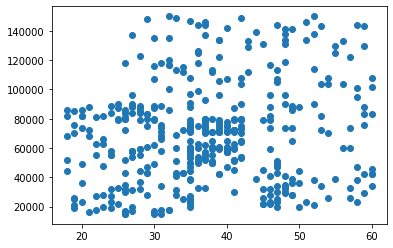

In [6]:
#3.VISUALISATION
import matplotlib.pyplot as plt
plt.scatter(df['Age'],df['EstimatedSalary'])
#Here we have got only one cluster before applying any clustering technique

In [7]:
#4.Finding out the number of clusters(k)
import numpy as np
np.sqrt(80) # 80 is the total no of points
#No of cluster - k
#k value should not exceed the square root of the total no of points
#Hence k value should be in the range of 2 to 14

8.94427190999916

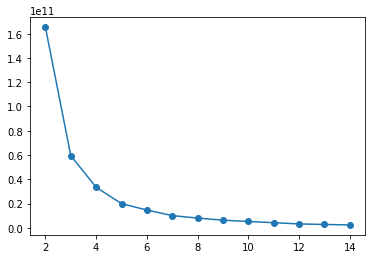

In [8]:
#5.ELBOW METHOD
from sklearn.cluster import KMeans
k = range(2,15)# my range is in between 2 and 14

sse = [] #blank list

#for i in range(2,15):
for i in k :
  model_demo = KMeans(n_clusters = i,random_state = 0)
  model_demo.fit(x)
  sse.append(model_demo.inertia_)#.inertia_ - calculates the sum of squared error
plt.scatter(k,sse)
plt.plot(k,sse)

2 Clusters ,Score = 0.537477824964991
3 Clusters ,Score = 0.6015031263266077
4 Clusters ,Score = 0.6066146767843497
5 Clusters ,Score = 0.610223988128696
6 Clusters ,Score = 0.5846075186044158
7 Clusters ,Score = 0.5771757527583528
8 Clusters ,Score = 0.5734148086437275
9 Clusters ,Score = 0.567938363430772
10 Clusters ,Score = 0.5707280151556086
11 Clusters ,Score = 0.5745161226163872
12 Clusters ,Score = 0.5899406839951461
13 Clusters ,Score = 0.5856208761624656
14 Clusters ,Score = 0.5815430121040257


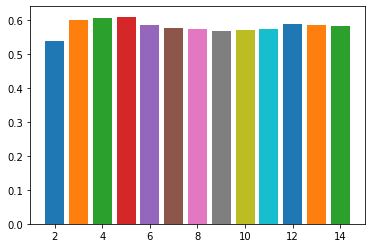

In [9]:
#6.SILHOUETTE SCORE METHOD
from sklearn.metrics import silhouette_score
k = range(2,15)
for i in k:
  model_demo = KMeans(n_clusters = i,random_state = 0)
  model_demo.fit(x)
  y_pred = model_demo.predict(x)
  print(f"{i} Clusters ,Score = {silhouette_score(x,y_pred)}")
  plt.bar(i,silhouette_score(x,y_pred))

In [10]:
#7.APPLYING CLUSTERER
k = 5
from sklearn.cluster import KMeans

model = KMeans(n_clusters = k,random_state = 0)
model.fit(x)

KMeans(n_clusters=5, random_state=0)

In [11]:
#8.Predicting output
y = model.predict(x) # predicted output
y

array([2, 2, 1, 1, 3, 1, 3, 4, 2, 1, 3, 1, 3, 2, 3, 3, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 2, 3, 4, 2, 1, 3, 2, 2, 1, 3, 2, 2, 1, 0, 2,
       3, 2, 3, 1, 4, 3, 2, 1, 3, 2, 1, 1, 1, 3, 2, 0, 2, 3, 1, 0, 3, 1,
       2, 3, 1, 3, 3, 2, 2, 0, 2, 0, 1, 2, 3, 2, 3, 1, 1, 3, 1, 0, 1, 3,
       3, 1, 3, 0, 2, 2, 3, 1, 2, 0, 3, 2, 3, 1, 3, 4, 2, 3, 2, 3, 3, 3,
       3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 2, 2, 3, 1, 2,
       3, 3, 1, 1, 3, 0, 1, 2, 3, 3, 1, 3, 2, 3, 0, 2, 1, 3, 2, 1, 3, 1,
       1, 2, 1, 3, 2, 4, 0, 3, 2, 2, 3, 3, 1, 3, 4, 1, 3, 0, 0, 1, 3, 2,
       1, 2, 2, 2, 2, 3, 0, 1, 1, 1, 3, 1, 3, 2, 3, 2, 1, 3, 3, 1, 3, 2,
       3, 2, 2, 3, 4, 3, 0, 1, 4, 0, 4, 2, 0, 4, 1, 1, 1, 0, 1, 3, 0, 4,
       3, 3, 4, 0, 1, 1, 4, 4, 3, 3, 4, 1, 0, 3, 0, 3, 1, 3, 3, 4, 4, 1,
       3, 0, 3, 4, 1, 0, 1, 0, 2, 1, 4, 4, 1, 3, 3, 1, 0, 4, 3, 4, 4, 3,
       3, 0, 3, 3, 4, 1, 4, 3, 1, 0, 2, 3, 3, 3, 2, 2, 3, 1, 3, 2, 4, 3,
       1, 4, 3, 3, 4, 3, 2, 3, 1, 1, 3, 0, 3, 0, 2,

In [12]:
#9.Finding size of y
y.size

400

In [13]:
#10.Selecting no. of rows and columns
x[y == 1,1]
#so the first '1' is cluster no 1 and the second '1' is column index 1 
#the value of input,when cluster 1 is selected and column index 1 selected

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1])

In [14]:
#12.Selecting the unique elements in the rows and columns
np.unique(y,return_counts = True)

(array([0, 1, 2, 3, 4], dtype=int32), array([ 43, 108,  87, 124,  38]))

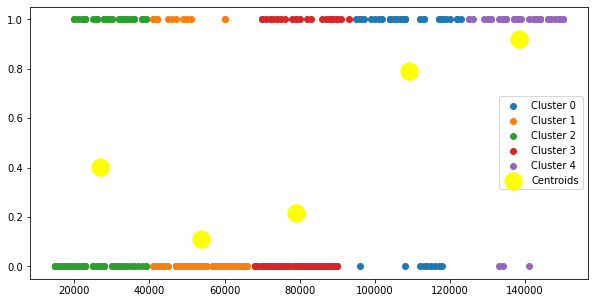

In [15]:
#13.FINAL VISUALISATION
plt.figure(figsize = (10,5))
for i in range(k):
  plt.scatter(x[y == i,0],x[y == i,1],label = f'Cluster {i}')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 300,c = 'yellow',
            label = 'Centroids')
plt.legend()